# Tutorial 17: Dispersão simbólica da onda de spin da cadeia FM

### Define-se a rede

In [87]:
% Ativa o modo simbólico no objeto FMchain.
FMchain = spinw;
FMchain.symbolic(true);


% Define a rede para a cadeia de spins ferromagnéticos.
FMchain.genlattice('lat_const',[3 4 4]);
FMchain.addatom('label','A1','r',[0 0 0],'S',1);
disp('Valor de spin simbólico:');
FMchain.unit_cell.S;
FMchain.gencoupling

> In sw_mff (line 118)
In spinw/addatom (line 303)
> In sw_cff (line 100)
In spinw/addatom (line 341)
> In sw_nb (line 83)
In spinw/addatom (line 364)
Valor de spin simbólico:
Creating the bond list (maxDistance = 8 Å, nCell = 3x3x3)...
...20 bonds are retained out of 196 generated!



Primeiro é ativado o modo simbólico no objeto FMchain, que será usado para representar a cadeia ferromagnética.

Depois, é definida a rede cristalina para a cadeia de spins ferromagnéticos. A função genlattice define os parâmetros da rede, e addatom adiciona um átomo à rede com a posição e o spin especificados. O comando disp exibe o valor simbólico do vetor de spin.

### Hamiltoniano Magnético

Quando definimos o hamiltoniano magnético, a matriz sw.matrix.mat conterá valores simbólicos. Os valores serão a variável simbólica criada a partir da opção ‘label’ e da matriz ‘value’. Se a entrada para a opção 'value' for simbólica, ela será atribuída diretamente ao campo sw.matrix.mat. Para as funções sw.addcoupling(), sw.addaniso(), sw.addg(), o valor do 'label' da matriz deve ser usado em vez dos valores simbólicos armazenados. Simplifica o cálculo se forem dados pressupostos apropriados para as variáveis simbólicas. No nosso caso, assumimos que J é positivo e usamos -J para o acoplamento.


Valor da matriz simbólica da entrada de tipo duplo:
Valor da matriz simbólica da entrada simbólica:
Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!



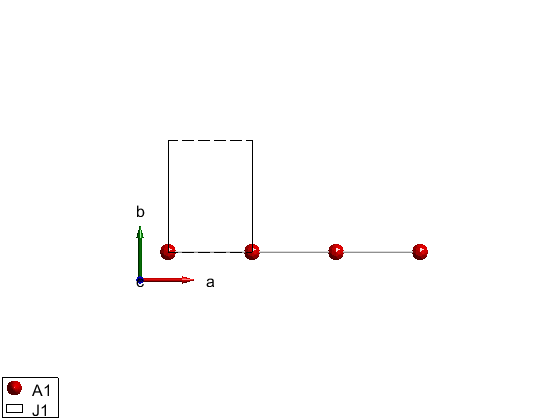

In [92]:
% Adiciona os acoplamentos magnéticos.
FMchain.addmatrix('label','J1','value',1/2); % Adiciona uma matriz de acoplamento com rótulo 'J1' e valor numérico 1/2.


disp('Valor da matriz simbólica da entrada de tipo duplo:'); 

% Exibe a matriz simbólica adicionada.
FMchain.matrix.mat; 

% Define um acoplamento magnético simbólico com a matriz J1 e valor -J.
FMchain.addmatrix('label','J1','value',-sym('J','positive')); 

disp('Valor da matriz simbólica da entrada simbólica:'); 

% Exibe a matriz simbólica adicionada.
FMchain.matrix.mat; 

% Adiciona o acoplamento à rede, ligando-o à matriz J1 e à ligação 1.
FMchain.addcoupling('mat','J1','bond',1); 

% Plota a rede magnética com o novo acoplamento adicionado.
plot(FMchain,'range',[3 0.5 0.5]); 


### Estrutura magnética

Podemos definir a estrutura magnética como de costume. Os componentes de spin simbólicos normalizados serão criados. Além da estrutura magnética também pode ser criada usando variáveis de entrada simbólicas, por exemplo, vetor k incomensurável, etc.



Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
> In swplot.plotmag (line 212)
In spinw/plot (line 295)
...2k faces and 1k vertices are drawn!



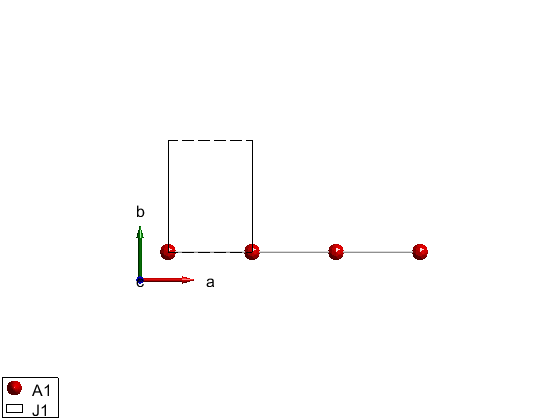

In [96]:
% Define a estrutura magnética da cadeia FM.
FMchain.genmagstr('mode','helical','S',[0; 1; 0]);
FMchain.magtable.M;
% Plota a estutura
plot(FMchain,'range',[3 0.5 0.5],'zoom',1)

### Energia do estado fundamental

A energia do estado fundamental também pode ser calculada para o modo simbólico.

In [100]:
% Calcula e exibe a energia do estado fundamental.
disp('Energia do estado fundamental meV/spin:');
FMchain.energy;


Energia do estado fundamental meV/spin:
Ground state energy (1/spin):
           2
E == -J S_1




### Dispersão de ondas de spin


Para o modo simbólico, apenas a dispersão da onda de spin pode ser calculada chamando a função sw.spinwave. Produz a dispersão geral sem qualquer entrada adicional. Notamos que o resultado final não está em um formato bonito, mas esta é a limitação da função simplify() do mecanismo simbólico.

In [104]:
% Calcula a dispersão da onda de spin.
FMspec = FMchain.spinwave();
pretty(FMspec.omega);

> In spinw/spinwave (line 294)
Calculating SYMBOLIC COMMENSURATE spin wave spectra (nMagExt = 1)...
Calculating SYMBOLIC eigenvalues... ready!
/                                        2 \
|  J S_1 exp(-pi h 2i) (exp(pi h 2i) - 1)  |
|                                          |
|                                        2 |
\ -J S_1 exp(-pi h 2i) (exp(pi h 2i) - 1)  /




### Plota o espectro de onda de spin

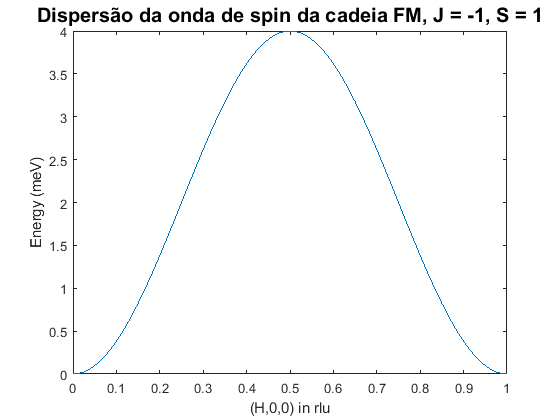

In [107]:
% Calcula e plota a dispersão da onda de spin ao longo da direção (H,0,0).
h = linspace(0,1,501); 
J = 1; % Define o valor do acoplamento magnético J como 1.
S_1 = 1; % Define o valor do momento magnético S_1 como 1.

% Calcula as energias reais da dispersão da onda de spin ao longo da direção (H,0,0).
w = real(eval(FMspec.omega(2))); % Avalia a expressão simbólica FMspec.omega(2) para obter as energias reais.

% Cria uma nova figura e plota a dispersão da onda de spin em função da direção H.
figure;
plot(h,w);

% Adiciona rótulo ao eixo x indicando a direção (H,0,0) em unidades recíprocas de comprimento.
xlabel('(H,0,0) in rlu');

% Adiciona rótulo ao eixo y indicando a energia em milielectronvolts.
ylabel('Energy (meV)');

% Adiciona título ao gráfico indicando a dispersão da onda de spin da cadeia ferromagnética com os valores de J e S especificados. O tamanho da fonte do título é definido como 15.
title('Dispersão da onda de spin da cadeia FM, J = -1, S = 1', 'FontSize', 15);
